In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

### 데이터 로드 및 전처리

In [26]:
diabetes = load_diabetes()
df_X, df_y = diabetes.data, diabetes.target
X = np.array(df_X)
y = np.array(df_y)

### 테스트,트레인셋 나누기


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### 가중치와 편향 초기화



In [28]:
W = np.random.randn(X_train.shape[1])
b = np.random.randn()



### 모델정의


In [29]:
def model(X, W, b):
    return X @ W + b



### MSE정의


In [30]:
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

### 기울기함수 정의

In [31]:
def gradients(X, y_true, y_pred):
    m = X.shape[0]
    dW = -2 * np.dot(X.T, (y_true - y_pred)) / m
    db = -2 * np.sum(y_true - y_pred) / m
    return dW, db

### 학습 및 테스트

In [32]:
# 학습률
learning_rate = 0.01

# 학습실행
n_epochs = 100000
loss_prev = float("inf")
tolerance = 0.001

for epoch in range(n_epochs):
    y_pred = model(X_train, W, b)
    loss = mse_loss(y_train, y_pred)
    dW, db = gradients(X_train, y_train, y_pred)

    W -= learning_rate * dW
    b -= learning_rate * db

    if epoch % 5000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

    if abs(loss_prev - loss) < tolerance:
        print(f"Converged at epoch {epoch}, Loss: {loss}")
        break

    loss_prev = loss

# 테스트
y_test_pred = model(X_test, W, b)
test_loss = mse_loss(y_test, y_test_pred)
print(f"Test Loss: {test_loss}")



Epoch 0, Loss: 29518.906592210813
Epoch 5000, Loss: 4010.437907850962
Epoch 10000, Loss: 3444.8547044622155
Epoch 15000, Loss: 3215.5067851497183
Epoch 20000, Loss: 3094.5282019922515
Epoch 25000, Loss: 3023.1493820044357
Epoch 30000, Loss: 2979.1728829657277
Epoch 35000, Loss: 2951.487221294419
Epoch 40000, Loss: 2933.777478430376
Epoch 45000, Loss: 2922.278593499094
Epoch 50000, Loss: 2914.6977048786493
Converged at epoch 52609, Loss: 2911.8010778020875
Test Loss: 2868.153857755411


### 시각화

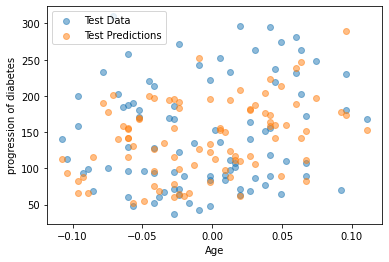

In [13]:
plt.scatter(X_test[:, 0], y_test, label="Test Data", alpha=0.5)
plt.scatter(X_test[:, 0], model(X_test, W, b), label="Test Predictions", alpha=0.5)

plt.xlabel("Age")
plt.ylabel("progression of diabetes")
plt.legend()
plt.show()